##**Import Libraries**

In [ ]:
!pip install -q mediapipe==0.10.0
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [ ]:
# Import Important Libraries
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

In [ ]:
# Import Mediapipe libraries
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

##**Import extracted dataset**

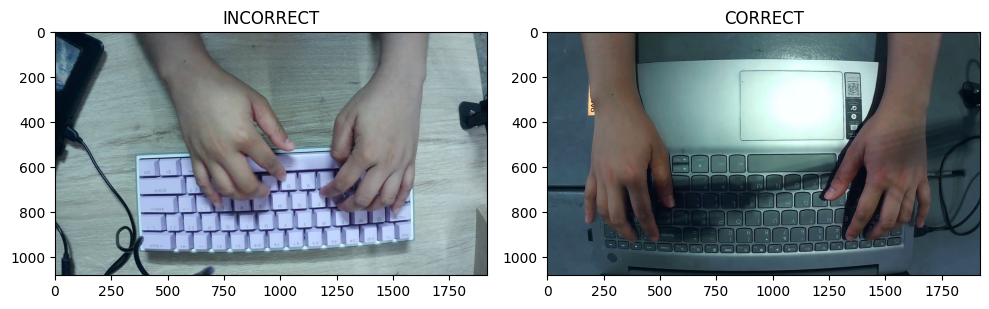

In [ ]:
handpostures_dataset = '/content/drive/MyDrive/TEAM 29 - FINALEST/FINAL HAND POSTURES DATASET'

# List all class folders
class_folders = [f for f in os.listdir(handpostures_dataset) if os.path.isdir(os.path.join(handpostures_dataset, f))]


# Plot images from each class
plt.figure(figsize=(10, 6))

for i, class_name in enumerate(class_folders, 1):
    class_path = os.path.join(handpostures_dataset, class_name)
    image_files = os.listdir(class_path)

    if image_files:
        sample_image = os.path.join(class_path, image_files[0])

        plt.subplot(1, len(class_folders), i)
        img = plt.imread(sample_image)

        plt.imshow(img)
        plt.title(class_name)
    else:
        print(f"No images found for class: {class_name}")

plt.tight_layout()
plt.show()

##**Draw hand landmarks**

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [ ]:
# Function to process an image
def draw_landmarks(image_path):
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = hands.process(image_rgb)

  # Draw landmarks
  if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
  return image

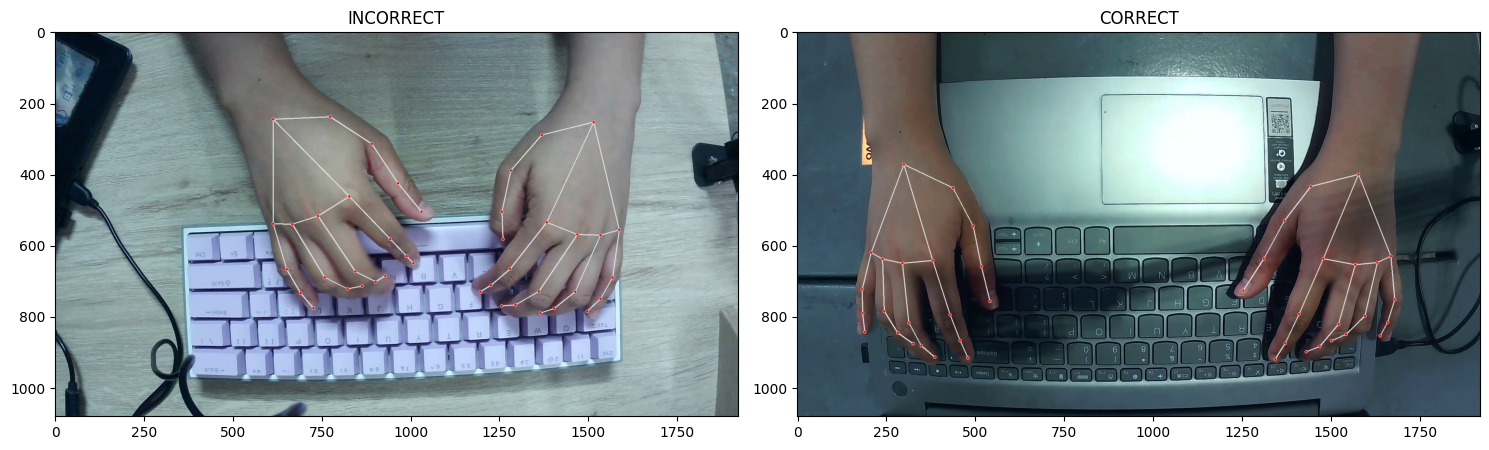

In [ ]:
class_folder = ['Correct', 'Incorrect']

plt.figure(figsize=(15, 5))

for i, class_name in enumerate(class_folders, 1):
    class_path = os.path.join(handpostures_dataset, class_name)
    image_files = os.listdir(class_path)
    sample_image = os.path.join(class_path, image_files[0])

    if image_files:
        sample_image = os.path.join(class_path, image_files[0])

        plt.subplot(1, len(class_folders), i)
        img_with_landmarks = draw_landmarks(sample_image)  # Process image with landmarks

        plt.imshow(cv2.cvtColor(img_with_landmarks, cv2.COLOR_BGR2RGB))
        plt.title(class_name)

    else:
        print(f"No images found for class: {class_name}")

plt.tight_layout()
plt.show()

###**Extract landmarks**

In [ ]:
def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    landmarks_data = []
    if results.multi_hand_landmarks:
        num_hands = min(2, len(results.multi_hand_landmarks))
        for hand_idx in range(num_hands):
            hand_landmarks = results.multi_hand_landmarks[hand_idx]
            landmarks = {}
            for idx, landmark in enumerate(hand_landmarks.landmark):
                if idx in [0, 1, 2, 5, 9, 13, 17]:
                    landmark_name = {
                        0: 'wrist',
                        1: 'thumb_cmc',
                        2: 'thumb_mcp',
                        5: 'index_finger_mcp',
                        9: 'middle_finger_mcp',
                        13: 'ring_finger_mcp',
                        17: 'pinky_mcp'
                    }.get(idx)
                    landmarks[f'{landmark_name}'] = {
                        'X': landmark.x,
                        'Y': landmark.y,
                        'Z': landmark.z if hasattr(landmark, 'z') else None
                    }
            landmarks_data.append(landmarks)
    return landmarks_data

##**Dataset with hand landmarks**

In [ ]:
import pandas as pd
class_folders = ['CORRECT', 'INCORRECT']
handlandmarks_data = []

for class_name in class_folders:
    class_path = os.path.join(handpostures_dataset, class_name)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)

        try:
            image_landmarks = extract_landmarks(image_path)
        except:
            print(f"Error extracting landmarks from {image_path}")
            continue

        if image_landmarks is not None:
            row = {'Class': class_name, 'Image': image_file}
            for hand_idx, landmarks in enumerate(image_landmarks):
                for landmark_name, coords in landmarks.items():
                    for coord, value in coords.items():
                        row[f"{landmark_name}_{coord}_hand{hand_idx}"] = value
            handlandmarks_data.append(row)

handlandmarks_data = pd.DataFrame(handlandmarks_data)
# data = data.replace({np.nan: None})

In [ ]:
handlandmarks_data.drop('Image', axis=1, inplace=True)

In [ ]:
handlandmarks_data

,Class,wrist_X_hand0,wrist_Y_hand0,wrist_Z_hand0,thumb_cmc_X_hand0,thumb_cmc_Y_hand0,thumb_cmc_Z_hand0,thumb_mcp_X_hand0,thumb_mcp_Y_hand0,thumb_mcp_Z_hand0,...,index_finger_mcp_Z_hand1,middle_finger_mcp_X_hand1,middle_finger_mcp_Y_hand1,middle_finger_mcp_Z_hand1,ring_finger_mcp_X_hand1,ring_finger_mcp_Y_hand1,ring_finger_mcp_Z_hand1,pinky_mcp_X_hand1,pinky_mcp_Y_hand1,pinky_mcp_Z_hand1
0,CORRECT,0.156501,0.345090,4.155586e-07,0.228416,0.405817,-0.017091,0.258127,0.506408,-0.027832,...,-0.073502,0.817308,0.606334,-0.054859,0.849798,0.600491,-0.035569,0.869322,0.583366,-0.017911
1,CORRECT,0.155003,0.348453,4.272890e-07,0.229241,0.411859,-0.018551,0.257876,0.511528,-0.030888,...,-0.075271,0.816545,0.607741,-0.056715,0.849146,0.601570,-0.037403,0.869535,0.584334,-0.019676
2,CORRECT,0.155033,0.347621,4.035594e-07,0.228655,0.410441,-0.018240,0.257931,0.509598,-0.029247,...,-0.080184,0.816795,0.605693,-0.058953,0.849038,0.600594,-0.036444,0.868941,0.584935,-0.015294
3,CORRECT,0.156165,0.348301,4.193355e-07,0.229460,0.411792,-0.019017,0.257969,0.509287,-0.030806,...,-0.069455,0.818689,0.603424,-0.052951,0.851572,0.598765,-0.036040,0.870407,0.581843,-0.020557
4,CORRECT,0.155264,0.346518,3.944915e-07,0.229746,0.413144,-0.016000,0.257858,0.511170,-0.026862,...,-0.070213,0.819879,0.604746,-0.054924,0.853668,0.599356,-0.039090,0.872584,0.581007,-0.024557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,INCORRECT,0.308950,0.325475,1.462814e-07,0.393285,0.339766,-0.001188,0.435844,0.435281,-0.000252,...,-0.017621,0.765399,0.531348,-0.009572,0.809560,0.506314,0.000318,0.840623,0.464872,0.010762
8606,INCORRECT,0.310153,0.330091,1.872773e-07,0.393914,0.346503,-0.003988,0.436708,0.440438,-0.006577,...,-0.026426,0.767538,0.531424,-0.018334,0.810588,0.507607,-0.008762,0.841055,0.467903,0.000795
8607,INCORRECT,0.310723,0.337165,2.430899e-07,0.394392,0.355619,-0.004203,0.437456,0.448985,-0.006722,...,-0.016939,0.768635,0.530517,-0.008095,0.810353,0.506005,0.002636,0.840130,0.465334,0.013460
8608,INCORRECT,0.312773,0.342063,3.447031e-07,0.398165,0.368610,-0.005738,0.440568,0.465248,-0.011165,...,-0.023431,0.767314,0.538236,-0.014128,0.809363,0.513720,-0.003026,0.838797,0.471667,0.008243


In [ ]:
handlandmarks_data.isnull().sum()

Class                          0
wrist_X_hand0                  0
wrist_Y_hand0                  0
wrist_Z_hand0                  0
thumb_cmc_X_hand0              0
thumb_cmc_Y_hand0              0
thumb_cmc_Z_hand0              0
thumb_mcp_X_hand0              0
thumb_mcp_Y_hand0              0
thumb_mcp_Z_hand0              0
index_finger_mcp_X_hand0       0
index_finger_mcp_Y_hand0       0
index_finger_mcp_Z_hand0       0
middle_finger_mcp_X_hand0      0
middle_finger_mcp_Y_hand0      0
middle_finger_mcp_Z_hand0      0
ring_finger_mcp_X_hand0        0
ring_finger_mcp_Y_hand0        0
ring_finger_mcp_Z_hand0        0
pinky_mcp_X_hand0              0
pinky_mcp_Y_hand0              0
pinky_mcp_Z_hand0              0
wrist_X_hand1                102
wrist_Y_hand1                102
wrist_Z_hand1                102
thumb_cmc_X_hand1            102
thumb_cmc_Y_hand1            102
thumb_cmc_Z_hand1            102
thumb_mcp_X_hand1            102
thumb_mcp_Y_hand1            102
thumb_mcp_

In [ ]:
handlandmarks_data.dropna(inplace=True)

In [ ]:
handlandmarks_data

,Class,wrist_X_hand0,wrist_Y_hand0,wrist_Z_hand0,thumb_cmc_X_hand0,thumb_cmc_Y_hand0,thumb_cmc_Z_hand0,thumb_mcp_X_hand0,thumb_mcp_Y_hand0,thumb_mcp_Z_hand0,...,index_finger_mcp_Z_hand1,middle_finger_mcp_X_hand1,middle_finger_mcp_Y_hand1,middle_finger_mcp_Z_hand1,ring_finger_mcp_X_hand1,ring_finger_mcp_Y_hand1,ring_finger_mcp_Z_hand1,pinky_mcp_X_hand1,pinky_mcp_Y_hand1,pinky_mcp_Z_hand1
0,CORRECT,0.156501,0.345090,4.155586e-07,0.228416,0.405817,-0.017091,0.258127,0.506408,-0.027832,...,-0.073502,0.817308,0.606334,-0.054859,0.849798,0.600491,-0.035569,0.869322,0.583366,-0.017911
1,CORRECT,0.155003,0.348453,4.272890e-07,0.229241,0.411859,-0.018551,0.257876,0.511528,-0.030888,...,-0.075271,0.816545,0.607741,-0.056715,0.849146,0.601570,-0.037403,0.869535,0.584334,-0.019676
2,CORRECT,0.155033,0.347621,4.035594e-07,0.228655,0.410441,-0.018240,0.257931,0.509598,-0.029247,...,-0.080184,0.816795,0.605693,-0.058953,0.849038,0.600594,-0.036444,0.868941,0.584935,-0.015294
3,CORRECT,0.156165,0.348301,4.193355e-07,0.229460,0.411792,-0.019017,0.257969,0.509287,-0.030806,...,-0.069455,0.818689,0.603424,-0.052951,0.851572,0.598765,-0.036040,0.870407,0.581843,-0.020557
4,CORRECT,0.155264,0.346518,3.944915e-07,0.229746,0.413144,-0.016000,0.257858,0.511170,-0.026862,...,-0.070213,0.819879,0.604746,-0.054924,0.853668,0.599356,-0.039090,0.872584,0.581007,-0.024557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,INCORRECT,0.308950,0.325475,1.462814e-07,0.393285,0.339766,-0.001188,0.435844,0.435281,-0.000252,...,-0.017621,0.765399,0.531348,-0.009572,0.809560,0.506314,0.000318,0.840623,0.464872,0.010762
8606,INCORRECT,0.310153,0.330091,1.872773e-07,0.393914,0.346503,-0.003988,0.436708,0.440438,-0.006577,...,-0.026426,0.767538,0.531424,-0.018334,0.810588,0.507607,-0.008762,0.841055,0.467903,0.000795
8607,INCORRECT,0.310723,0.337165,2.430899e-07,0.394392,0.355619,-0.004203,0.437456,0.448985,-0.006722,...,-0.016939,0.768635,0.530517,-0.008095,0.810353,0.506005,0.002636,0.840130,0.465334,0.013460
8608,INCORRECT,0.312773,0.342063,3.447031e-07,0.398165,0.368610,-0.005738,0.440568,0.465248,-0.011165,...,-0.023431,0.767314,0.538236,-0.014128,0.809363,0.513720,-0.003026,0.838797,0.471667,0.008243


In [ ]:
correct_posture = handlandmarks_data[handlandmarks_data['Class'] == 'CORRECT']
print("CORRECT HAND POSTURE")
correct_posture.transpose()

CORRECT HAND POSTURE


,0,1,2,3,4,5,6,7,8,9,...,4374,4375,4376,4377,4378,4379,4380,4381,4382,4383
Class,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,...,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT
wrist_X_hand0,0.156501,0.155003,0.155033,0.156165,0.155264,0.155673,0.155818,0.15752,0.157174,0.156398,...,0.295366,0.291618,0.294066,0.296109,0.29502,0.292833,0.295994,0.298009,0.298622,0.296454
wrist_Y_hand0,0.34509,0.348453,0.347621,0.348301,0.346518,0.344426,0.34299,0.344861,0.346209,0.345817,...,0.175159,0.177808,0.18361,0.182183,0.176199,0.178895,0.18333,0.182766,0.183062,0.182394
wrist_Z_hand0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
thumb_cmc_X_hand0,0.228416,0.229241,0.228655,0.22946,0.229746,0.229585,0.230014,0.230705,0.229374,0.228757,...,0.384391,0.381655,0.383817,0.38451,0.384062,0.383034,0.384353,0.386106,0.386411,0.385882
thumb_cmc_Y_hand0,0.405817,0.411859,0.410441,0.411792,0.413144,0.410168,0.414023,0.410106,0.405569,0.404443,...,0.186087,0.187386,0.193554,0.19436,0.188956,0.1915,0.194667,0.192427,0.192394,0.192275
thumb_cmc_Z_hand0,-0.017091,-0.018551,-0.01824,-0.019017,-0.016,-0.016879,-0.014239,-0.015035,-0.016495,-0.018664,...,0.000915,-0.000076,0.002152,0.006001,0.00249,0.002213,0.005158,0.003745,0.003571,0.002876
thumb_mcp_X_hand0,0.258127,0.257876,0.257931,0.257969,0.257858,0.257166,0.257605,0.257844,0.256894,0.25649,...,0.444185,0.441981,0.441939,0.442674,0.443464,0.441584,0.442932,0.4443,0.44447,0.445306
thumb_mcp_Y_hand0,0.506408,0.511528,0.509598,0.509287,0.51117,0.510657,0.513031,0.510716,0.506997,0.505948,...,0.289895,0.287866,0.295721,0.294689,0.288625,0.292931,0.294159,0.291391,0.291505,0.292536
thumb_mcp_Z_hand0,-0.027832,-0.030888,-0.029247,-0.030806,-0.026862,-0.026891,-0.024249,-0.023812,-0.024965,-0.027482,...,0.005687,0.003737,0.008106,0.014245,0.008069,0.009239,0.014015,0.010476,0.009972,0.010069


In [ ]:
incorrect_handposture = handlandmarks_data[handlandmarks_data['Class'] == 'INCORRECT']
print("INCORRECT HAND POSTURE")
incorrect_handposture.transpose()

INCORRECT HAND POSTURE


,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,...,8600,8601,8602,8603,8604,8605,8606,8607,8608,8609
Class,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,...,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT
wrist_X_hand0,0.319753,0.319061,0.321595,0.331026,0.336853,0.341466,0.340896,0.341814,0.343267,0.344477,...,0.297243,0.30997,0.309756,0.308903,0.309662,0.30895,0.310153,0.310723,0.312773,0.312873
wrist_Y_hand0,0.227068,0.22892,0.221315,0.231199,0.218717,0.214561,0.216118,0.211696,0.214211,0.222373,...,0.268172,0.307116,0.317482,0.316275,0.321929,0.325475,0.330091,0.337165,0.342063,0.349882
wrist_Z_hand0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thumb_cmc_X_hand0,0.402659,0.402257,0.406419,0.415104,0.422082,0.427862,0.426316,0.430458,0.430884,0.431577,...,0.386126,0.394735,0.395212,0.394758,0.394961,0.393285,0.393914,0.394392,0.398165,0.399057
thumb_cmc_Y_hand0,0.220846,0.21952,0.220418,0.228266,0.228178,0.224847,0.221155,0.225517,0.227522,0.23269,...,0.290296,0.324202,0.334384,0.334716,0.339266,0.339766,0.346503,0.355619,0.36861,0.379665
thumb_cmc_Z_hand0,-0.010572,-0.009533,-0.006083,-0.005603,-0.001361,-0.000617,-0.007461,-0.003419,-0.00382,-0.006923,...,-0.003308,0.000755,0.000406,-0.000182,0.000128,-0.001188,-0.003988,-0.004203,-0.005738,-0.005908
thumb_mcp_X_hand0,0.464028,0.463181,0.466633,0.474046,0.479248,0.484154,0.484945,0.487079,0.486191,0.485996,...,0.433044,0.437454,0.437223,0.436755,0.436062,0.435844,0.436708,0.437456,0.440568,0.440324
thumb_mcp_Y_hand0,0.291516,0.290597,0.295909,0.307724,0.309211,0.309093,0.306135,0.311594,0.315095,0.318948,...,0.386836,0.418493,0.428905,0.429739,0.434185,0.435281,0.440438,0.448985,0.465248,0.477195
thumb_mcp_Z_hand0,-0.015038,-0.013202,-0.009547,-0.006181,-0.00059,-0.000523,-0.011543,-0.005832,-0.005545,-0.009681,...,-0.004911,0.002118,0.002587,0.001885,0.001613,-0.000252,-0.006577,-0.006722,-0.011165,-0.011789


##**Data Visualization**

<ipython-input-44-0c76091f9614>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data = handlandmarks_data, palette = 'RdBu_r')


<Axes: xlabel='Class', ylabel='count'>

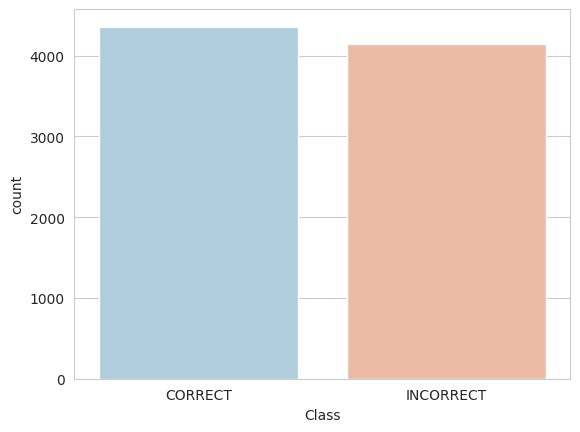

In [ ]:
# Data Visualization
sns.set_style('whitegrid')
sns.countplot(x='Class', data = handlandmarks_data, palette = 'RdBu_r')

##**Training the Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = handlandmarks_data.drop('Class', axis = 1)
y = handlandmarks_data.Class

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.25,
                                                    random_state = 60)

In [ ]:
rf_model = RandomForestClassifier(max_features = 'sqrt', n_estimators = 9,
                                   max_depth = 8, criterion = 'gini', class_weight="balanced").fit(x_train, y_train)

In [ ]:
rf_pred1 = rf_model.predict(x_test)
rf_pred2 = rf_model.predict(x_train)

In [ ]:
rf_pred = rf_model.predict_proba(x_test)

##**Classification Report, Confusion Matrix, Accuracy Score, ROC AUC score**

RANDOM FOREST CLASSIFIER 

 TESTING CLASSIFICATION REPORT 
               precision    recall  f1-score   support

     CORRECT       0.98      0.99      0.98      1070
   INCORRECT       0.98      0.98      0.98      1057

    accuracy                           0.98      2127
   macro avg       0.98      0.98      0.98      2127
weighted avg       0.98      0.98      0.98      2127

RANDOM FOREST CLASSIFIER 

 TRAINING CLASSIFICATION REPORT 
               precision    recall  f1-score   support

     CORRECT       0.99      0.99      0.99      3289
   INCORRECT       0.99      0.99      0.99      3092

    accuracy                           0.99      6381
   macro avg       0.99      0.99      0.99      6381
weighted avg       0.99      0.99      0.99      6381



CONFUSION MATRIX



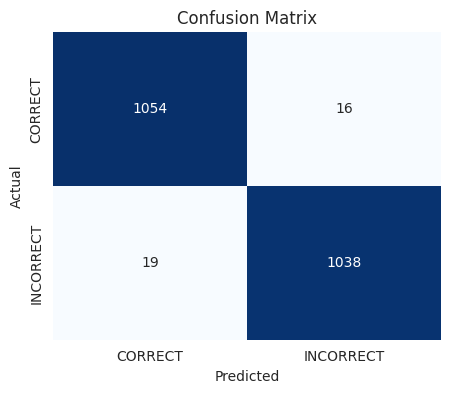



ROC AUC SCORE:  0.9982621420171708
Testing Accuracy Score:  0.9835448989186648
Training Accuracy Score:  0.9907538003447736


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
print('RANDOM FOREST CLASSIFIER \n\n TESTING CLASSIFICATION REPORT \n', classification_report(y_test, rf_pred1))
print('RANDOM FOREST CLASSIFIER \n\n TRAINING CLASSIFICATION REPORT \n', classification_report(y_train, rf_pred2))

print('\n\nCONFUSION MATRIX\n')
conf_matrix = confusion_matrix(y_test, rf_pred1)
# Plot confusion matrix with colormap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

rf_pred_proba = rf_model.predict_proba(x_test)
print('\n\nROC AUC SCORE: ', roc_auc_score(y_test, rf_pred_proba[:,1]))

print('Testing Accuracy Score: ', accuracy_score(y_test, rf_pred1))
print('Training Accuracy Score: ', accuracy_score(y_train, rf_pred2))


##**Saving the model**

In [ ]:
!pip install joblib

In [ ]:
import joblib
import os

In [ ]:
rf_model_path = '/content/drive/MyDrive/TEAM 29 - FINALEST/ANOTHER 3 DESIGNS/joblib files/final rf na talaga.joblib'
joblib.dump(rf_model, rf_model_path)

['/content/drive/MyDrive/TEAM 29 - FINALEST/ANOTHER 3 DESIGNS/joblib files/final rf na talaga.joblib']